# Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. 

In [1]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import the dataset

In [2]:
telecom_df = pd.read_excel(r"C:\Users\velda\Documents\Data_Analysis_Proj\Telecom Churn.xlsx")

# Understanding the Data

In [3]:
# Viewing the first 5 rows of the dataset
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Viewing the bottom 5 rows of the dataset
telecom_df.tail(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# To find all columns in the dataset
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**Breakdown of Our Features**

**STATE:** 51 Unique States name.

**Account Length:** Length of The Account.

**Area Code:** Code Number Of Area having some States.

**International Plane:** Yes Indicate International plane is present and No Indicates no subscription for International plane.

**Voice Mail Plane:** Yes Indicate Voice Mail Plane is present and No Indecates no subscription for Voice Mail Plane.

**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 50.

**Total day minutes:** Total Number of Minutes Spent in Morning.

**Total day calls:** Total Numbers of Calls made in Morning.

**Total day charge:** Total Charge to the Customers in Moring.

**Total eve minutes:** Total Number of Minutes Spent in Evening.

**Total eve calls:** Total Number of Calls made in Evening.

**Total eve charge:** Total Charge to the Customers in Evening.

**Total night minutes:** Total Number of Minutes Spent in the Night.

**Total night calls:** Total Number of Calls made in Night.

**Total night charge:** Total Charge to the Customersnin Night.

**Customers service calls** Number of customers service calls made by customers 


**night charge**: Total Charge to the Customersn in Night.

**Customers service calls**: Number of customers service calls made by customers 


**Churn Customer Churn**: True means churned customers, False means retained customer .omers, False means retained customer .stomers, False means retained customer .

In [6]:
# To find the datatype of all columns
telecom_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [7]:
# Finding the whole info about the dataset
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
# Finding all the unique values present in the dataset
telecom_df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [9]:
# Finding all math calculations of the dataset to get insights of the data
telecom_df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [10]:
# printing the count of the true and false in 'churn' feature
print(telecom_df.Churn.value_counts())

Churn
False    2850
True      483
Name: count, dtype: int64


# Checking for Missing And Duplicate Values

In [11]:
# checking for count of missing values in each column.
telecom_df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## There are no missing values present in our dataset.

# Checking for Duplicate Values

In [12]:
len(telecom_df[telecom_df.duplicated()])

0

**As of now There are 3333 rows and 20 columns in above dataset.**

**Out of which there are 1 boolean data type i.e churn**

**8 float data type,**

**8 integer data type,**

**3 object data type i.e categorical value are there.**

**There are no missing value present so no need to do the missing value imputation,**

**And also there are no duplicate value present.**

# EDA(Exploratory Data Analysis) of the Project

## The dependent variable here in this dataset is 'Churn'.

In [13]:
# Printing the unique value inside "churn" column
telecom_df["Churn"].unique()

array([False,  True])

In [14]:
# Printing the count of true and false in 'churn' feature
print(telecom_df.Churn.value_counts())

Churn
False    2850
True      483
Name: count, dtype: int64


### Pie Chart to analyze churn

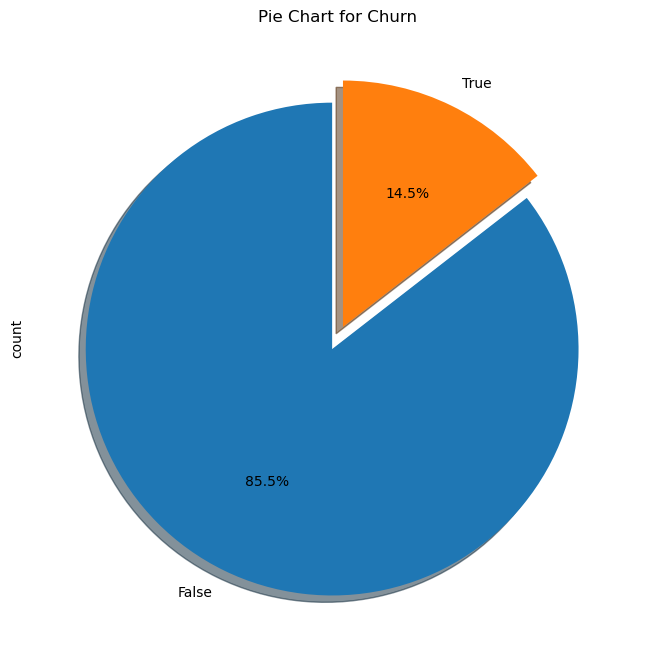

In [15]:
telecom_df['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct = '%1.1f%%', startangle = 90, shadow = True, figsize = (8,8))
plt.title('Pie Chart for Churn')
plt.show()

# Donut plot for churn

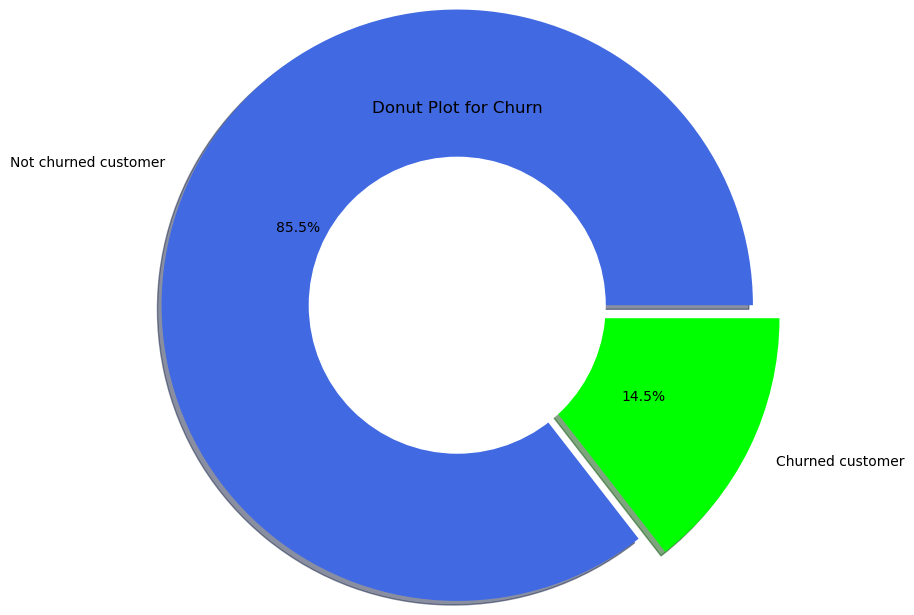

In [16]:
data = telecom_df['Churn'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode= explode, autopct= '%1.1f%%', shadow = True, radius= 2.0, labels= ['Not churned customer','Churned customer'], colors= ['royalblue', 'lime'])
circle = plt.Circle((0,0), 1, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

# Count plot for churn

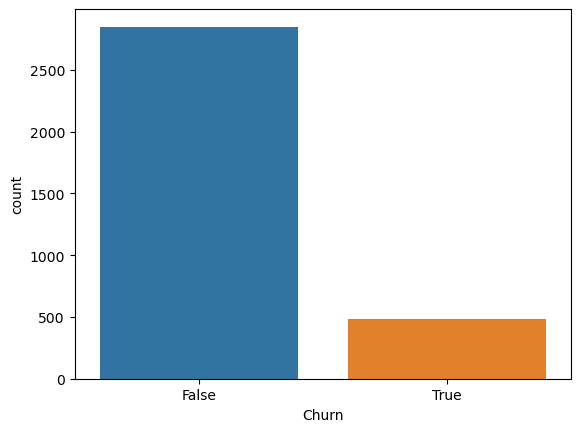

In [17]:
sns.countplot(x=telecom_df.Churn)
plt.show()

**After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn.**

## Analyzing 'state' column

In [18]:
# printing the unique value of state column
telecom_df['State'].nunique()

51

### Comparing churn with state using count plot

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

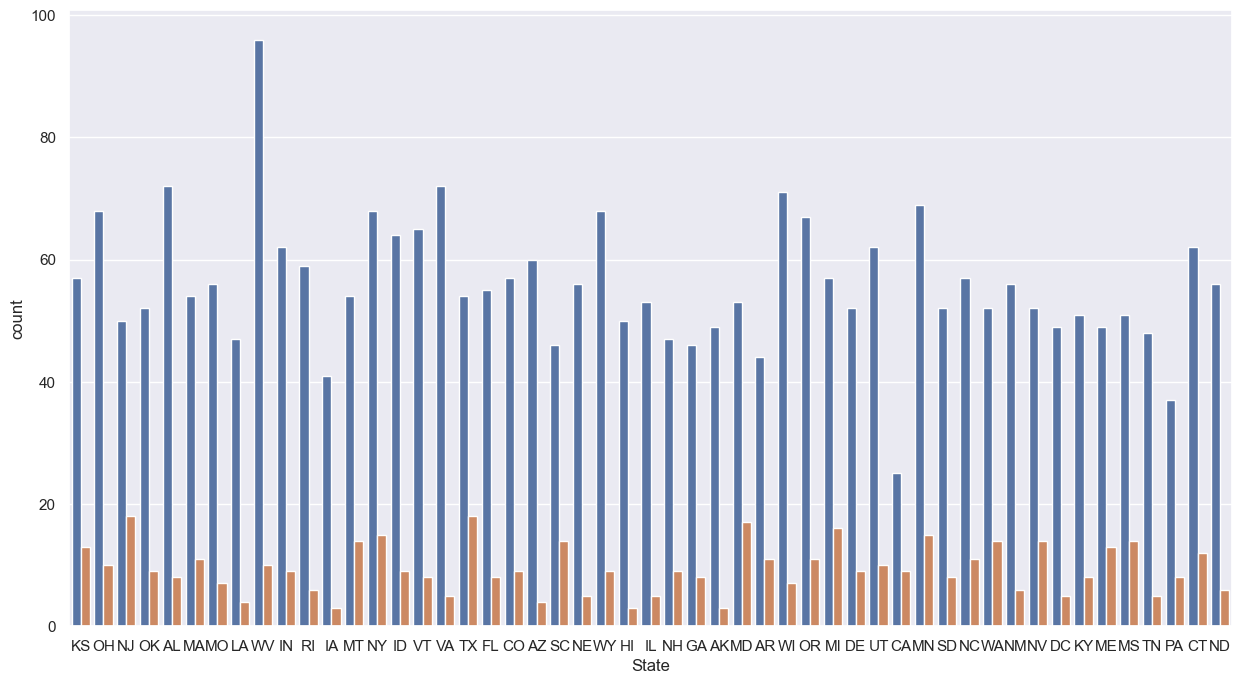

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x = 'State', hue = "Churn", data = telecom_df)
plt.show()

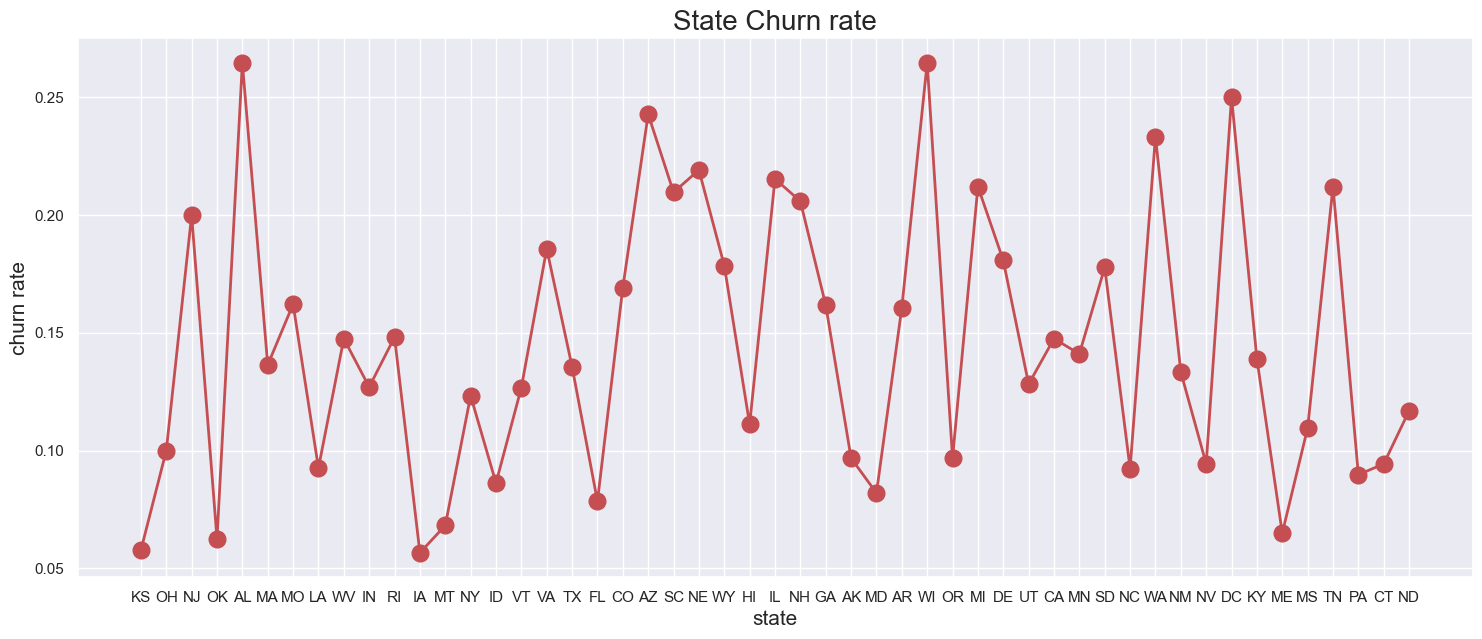

In [20]:
s1 = telecom_df['State'].unique()
s2 = telecom_df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1, s2, color='r', marker='o', linewidth= 2, markersize = 12)

plt.title("State Churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

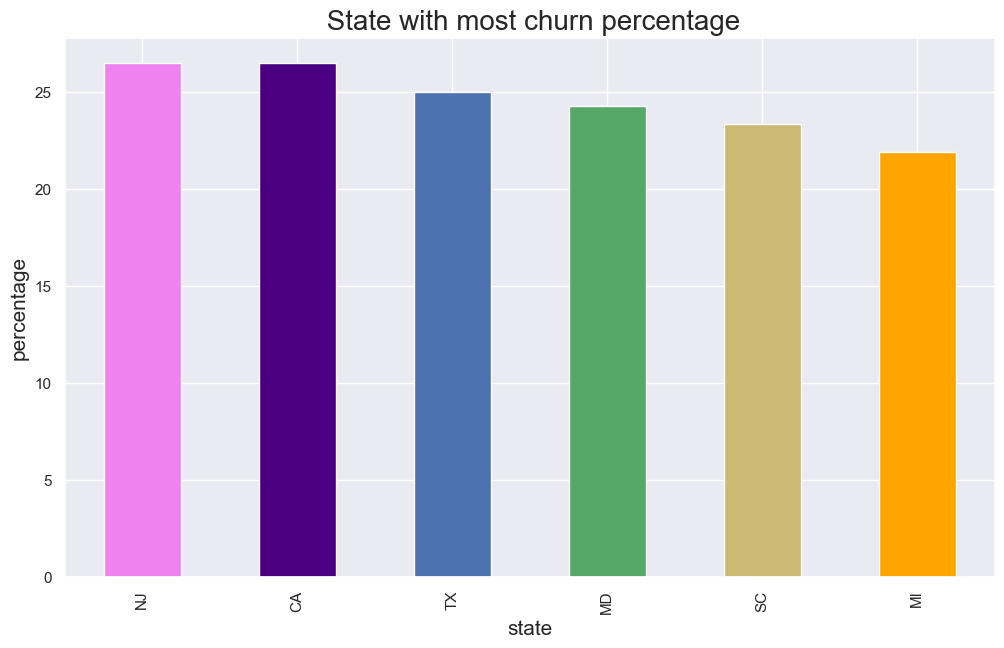

In [21]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((telecom_df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

## Calculating State vs Churn percentage

In [22]:
State_data = pd.crosstab(telecom_df["State"],telecom_df["Churn"])
State_data['Percenatge_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]), axis = 1) 
print(State_data)

Churn  False  True  Percenatge_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [23]:
# show the most churn state of top 10 by ascending the above list
telecom_df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

**There is 51 unique state present who have different churn rate.**

**From the above analysis CA,NJ,TX,MD,SC,MI are the ones who have a higher churn rate of more than 21.**

**The reason for this churn rate from a particular state may be due to the low coverage of the cellular network**

## Analyze 'Area Code' column

### Calculating Area Code vs Churn percentage

In [25]:
Area_code_data = pd.crosstab(telecom_df["Area code"], telecom_df["Churn"])
Area_code_data['Percenatge_Churn'] = Area_code_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_data)

Churn      False  True  Percenatge_Churn
Area code                               
408          716   122         14.558473
415         1419   236         14.259819
510          715   125         14.880952


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

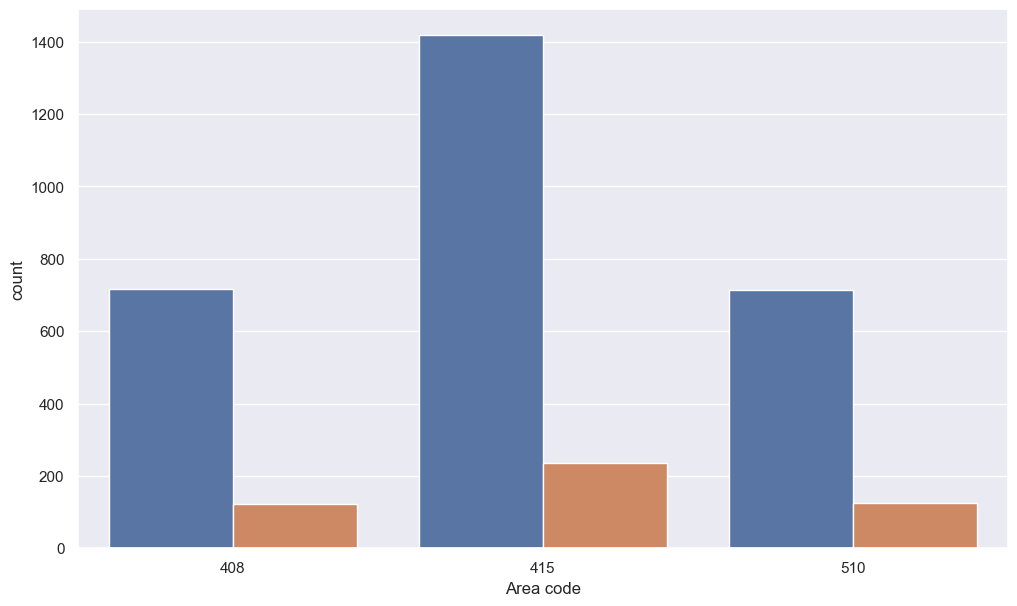

In [26]:
sns.set(style="darkgrid")
ax = sns.countplot(x = 'Area code', hue = "Churn", data = telecom_df) 
plt.show()

**In the above data, we notice that there is only 3 unique value are there i.e.408,415,510 and the churn rate of these area code are almost same we don't think there is any kind of relation pressent between the "area code" and "churn" due to which the customer leaves the operator.**

## Analyze 'Account Length' column

In [27]:
# Separating churn and non churn customers 
churn_df = telecom_df[telecom_df["Churn"] == bool(True)]
not_churn_df = telecom_df[telecom_df["Churn"] == bool(False)]

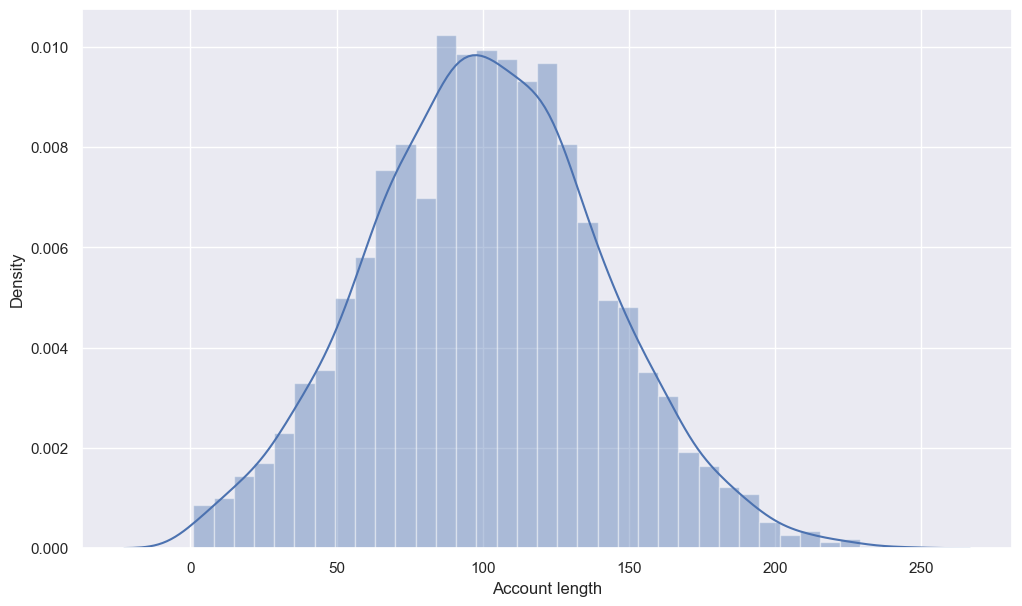

In [29]:
# Account length and non Churn
sns.distplot(telecom_df['Account length']) 
plt.show()

### Comparison of churned account length and not churned account length

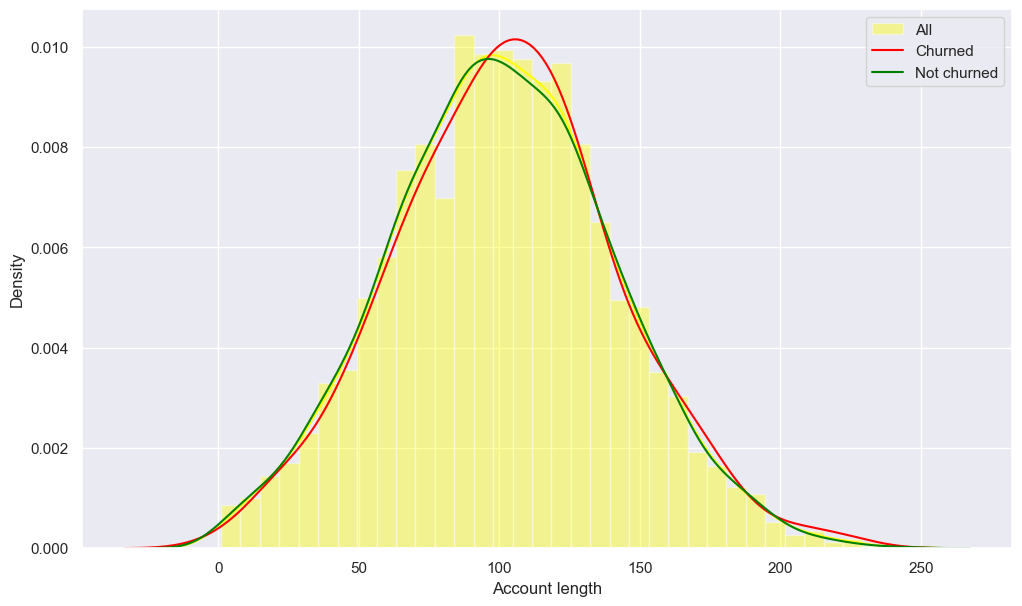

In [31]:
sns.distplot(telecom_df['Account length'],color='yellow', label="All")
sns.distplot(churn_df['Account length'],color="red", hist=False, label="Churned")
sns.distplot(not_churn_df['Account length'],color='green',hist=False, label= "Not churned") 
plt.legend()
plt.show()

## Analyze 'International Plan' column

In [32]:
# Show count value of 'yes', 'no'
telecom_df['International plan'].value_counts()

International plan
No     3010
Yes     323
Name: count, dtype: int64

In [33]:
# Show the unique data of "International Plan"
telecom_df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

### Calculating the International plan vs Churn percentage

In [34]:
International_plan_data = pd.crosstab(telecom_df["International plan"], telecom_df["Churn"])
International_plan_data['Percenatge Churn'] = International_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]), axis = 1)
print(International_plan_data)

Churn               False  True  Percenatge Churn
International plan                               
No                   2664   346         11.495017
Yes                   186   137         42.414861


### Dount Plot to analyze International Plan

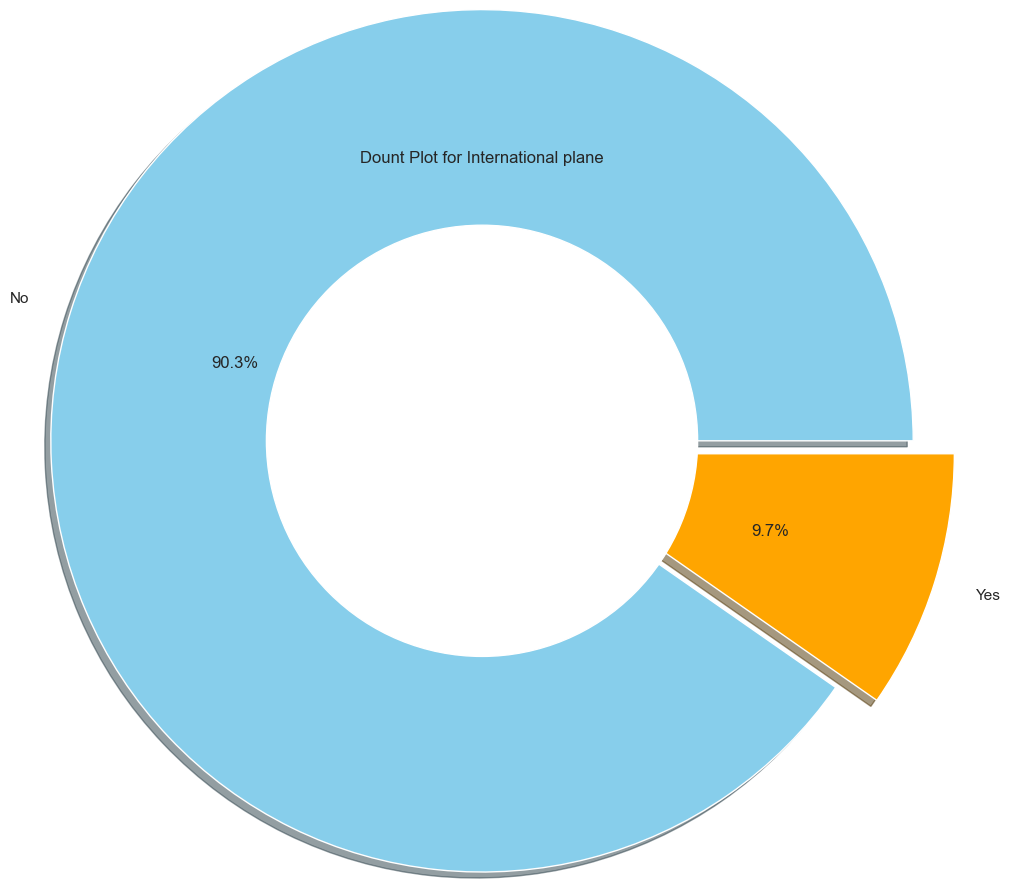

In [35]:
data = telecom_df['International plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode= explode,autopct= '%1.1f%%', shadow=True,radius=2.0, labels= ['No', 'Yes'], colors= ['skyblue', 'orange'])
circle = plt.Circle((0,0), 1, color = 'white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Dount Plot for International plane')
plt.show()

# Analysing by using countplot

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

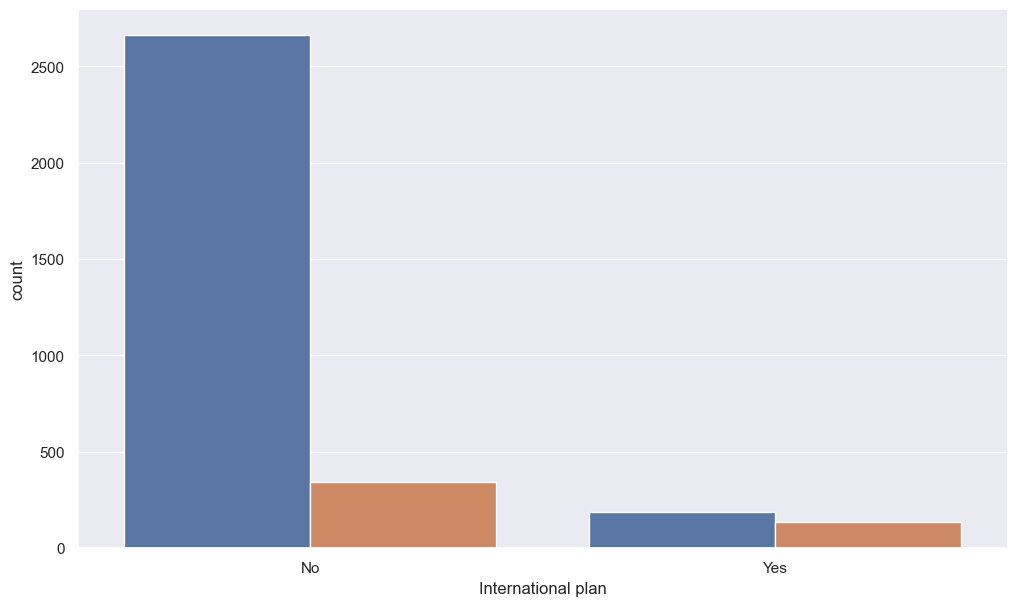

In [37]:
sns.countplot(x='International plan', hue="Churn", data = telecom_df)
plt.show()

**From the above data we get**

**There are 3010 customers who have a international plan.**

**There are 323 customers who have a international plan.**

**Among those who have international plan 42.4% people churn.**

**Where as among those who don't have a international plan only 11.4% people churn.**

**So basically the people who bought International plans are churning in big numbers.**

**Probaly because of connectivity issues or high call charge.**

## Analyze 'Voice Plan' column

In [38]:
# show the unique value of the "Voice mail plan" column
telecom_df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

# Calculating the Voice Mail Plan vs Churn perecentage

In [39]:
Voice_mail_plan_data = pd.crosstab(telecom_df["Voice mail plan"],telecom_df["Churn"])
Voice_mail_plan_data['Percentage Churn'] = Voice_mail_plan_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_data)

Churn            False  True  Percentage Churn
Voice mail plan                               
No                2008   403         16.715056
Yes                842    80          8.676790


### Donut plot to analyze Voice mail plan

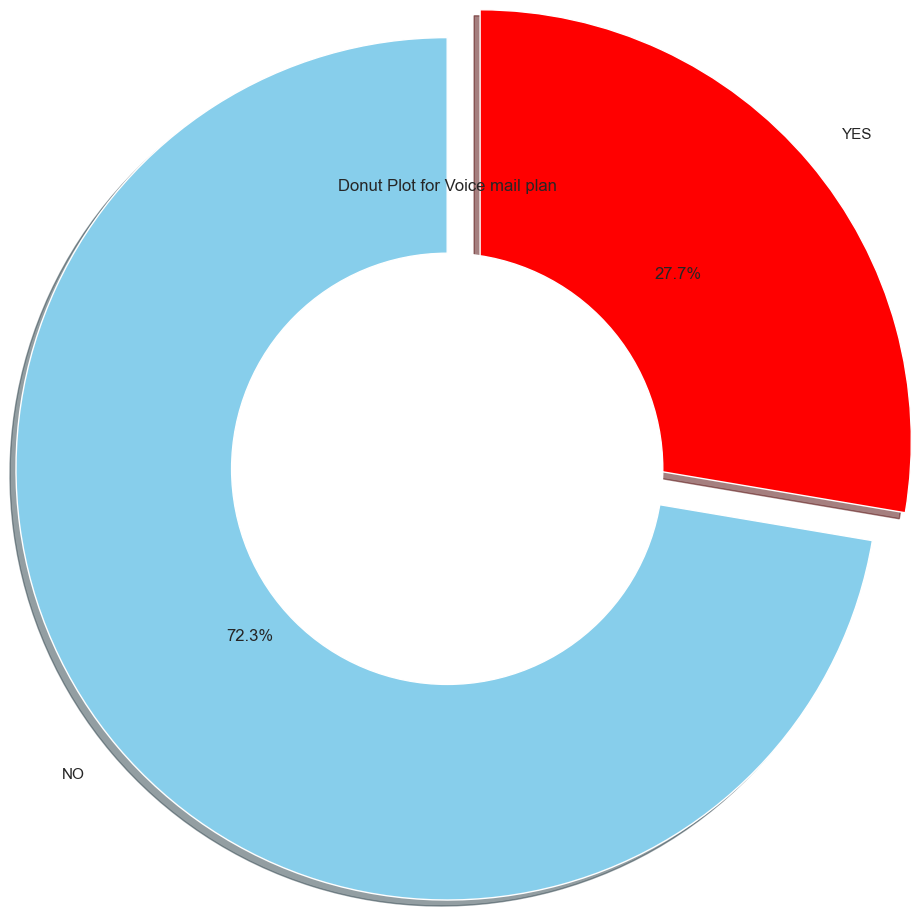

In [40]:
data = telecom_df['Voice mail plan'].value_counts()
explode = (0, 0.2)
plt.pie(data, explode= explode, autopct='%1.1f%%',startangle=90,shadow=True,radius=2.0, labels= ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle((0,0),1, color = 'white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Voice mail plan')
plt.show()

### Analysing by using countplot

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

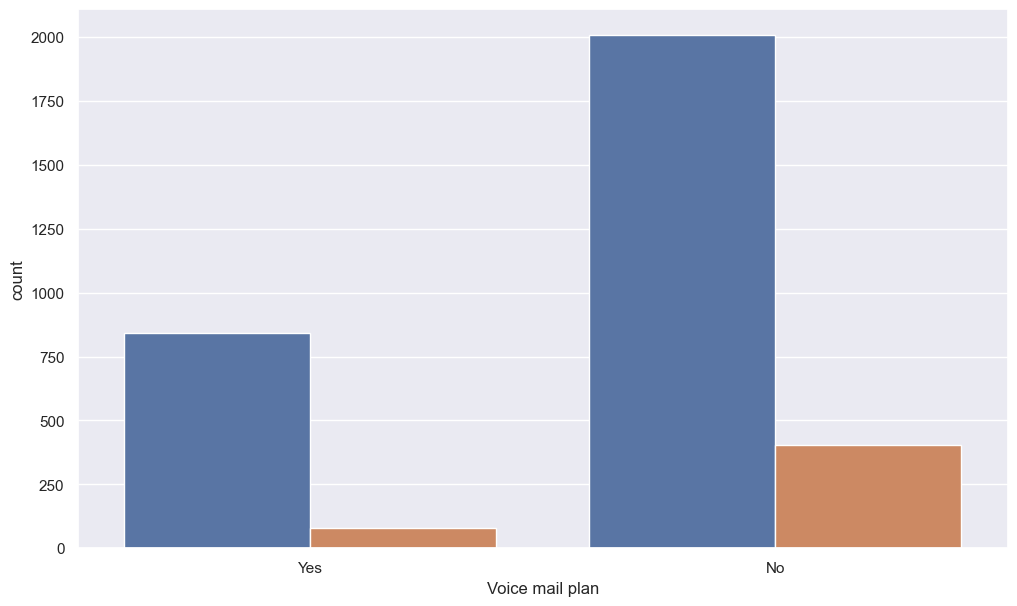

In [41]:
sns.countplot(x='Voice mail plan', hue = "Churn", data = telecom_df)
plt.show()

**As we can see there are no clear relation between voice mail plan and churn so we can't clearly say anything so let's move to the next voice mail feature i.e. number of voice mail, let's see what it gives to us.**

## Analyze 'Number vmail message' column

In [42]:
# show the data of 'Number vmail messages' 
telecom_df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9], dtype=int64)

In [43]:
# Printing the data of 'Number vmail message'
telecom_df['Number vmail messages'].value_counts()

Number vmail messages
0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: count, dtype: int64

In [44]:
# Show the details of 'Number vmail message' data
telecom_df['Number vmail messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

### Analysing by using displot diagram

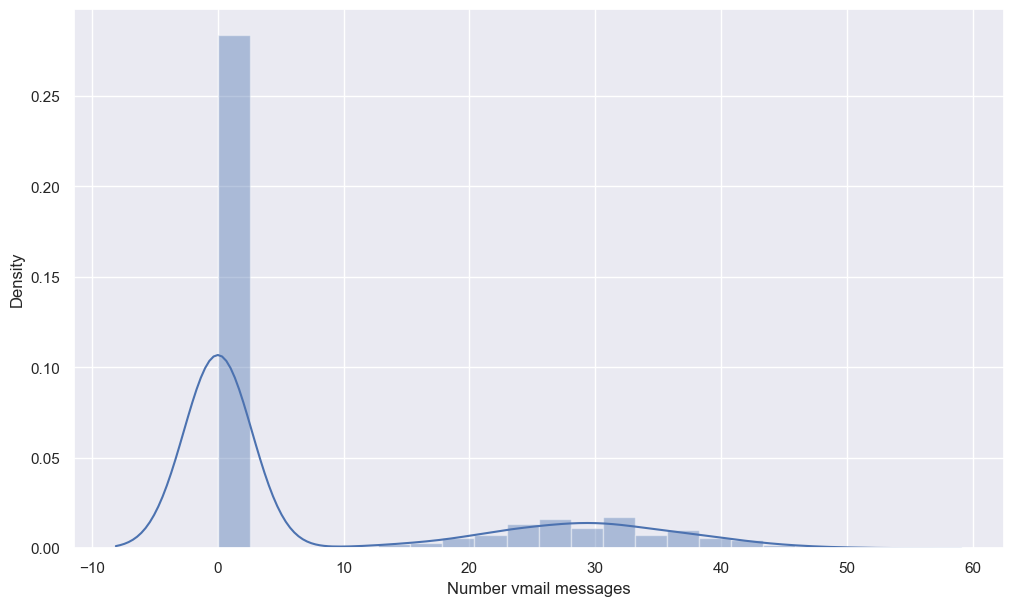

In [46]:
sns.distplot(telecom_df['Number vmail messages'])
plt.show()

### Analysing by using boxplot diagram between 'number vmail message' and 'churn'

<Figure size 1000x800 with 0 Axes>

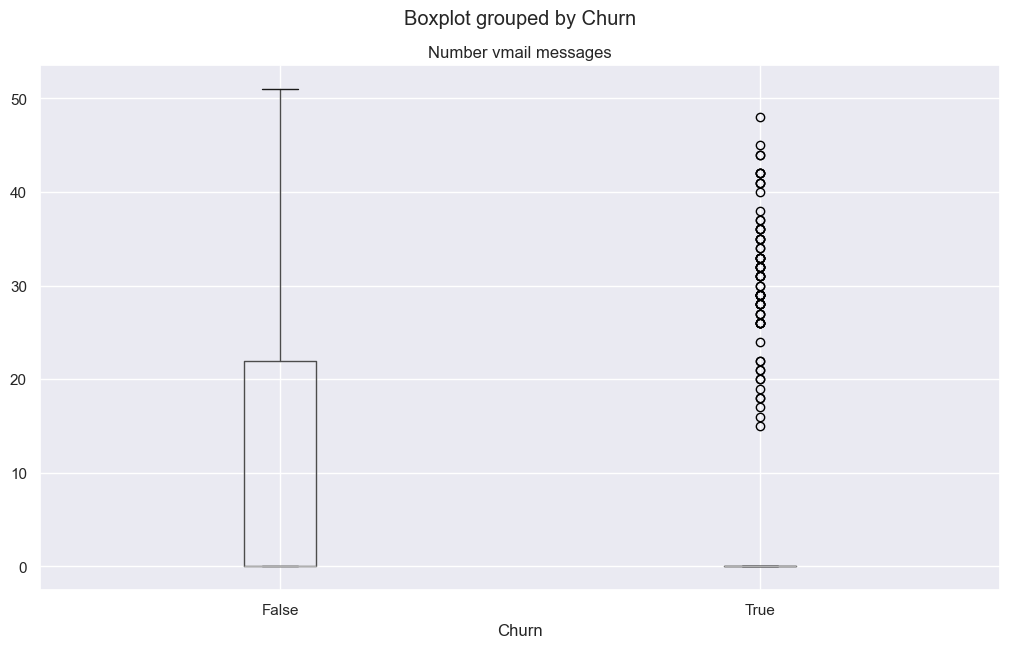

In [47]:
fig = plt.figure(figsize=(10, 8))
telecom_df.boxplot(column='Number vmail messages', by='Churn')
fig.suptitle('Number vmail message', fontsize = 14, fontweight = 'bold')
plt.show()

**After analyzing the above voice mail feature data we get an insight that when there are more than 20 voice-mail message then there is a churn For that, we need to improve the voice mail quality**

## Analyze 'Customer Service Calls' column

In [48]:
# Printing the data of customer service calls
telecom_df['Customer service calls'].value_counts()

Customer service calls
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: count, dtype: int64

### Calculating the Customer service calls vs Churn percentage

In [50]:
Customer_service_calls_data = pd.crosstab(telecom_df['Customer service calls'],telecom_df["Churn"])
Customer_service_calls_data['Percentage_Churn'] = Customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Customer_service_calls_data)

Churn                   False  True  Percentage_Churn
Customer service calls                               
0                         605    92         13.199426
1                        1059   122         10.330229
2                         672    87         11.462451
3                         385    44         10.256410
4                          90    76         45.783133
5                          26    40         60.606061
6                           8    14         63.636364
7                           4     5         55.555556
8                           1     1         50.000000
9                           0     2        100.000000


### Analysing using countplot

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

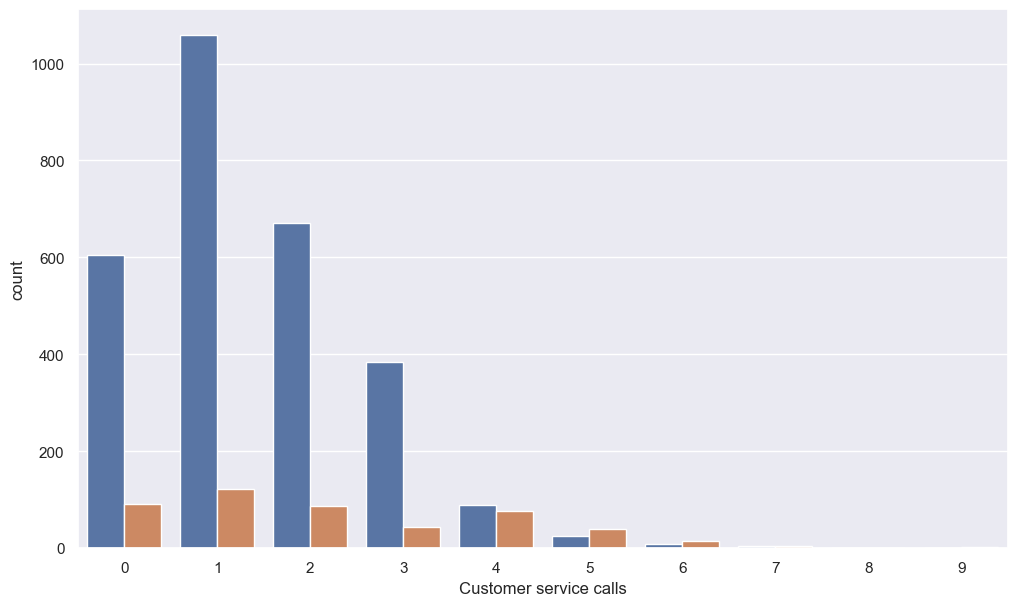

In [51]:
sns.countplot(x='Customer service calls',hue="Churn",data=telecom_df)

**It is observed from the above analysis that, mostly because of bad customer service,people tend to leave the operator.**

**The above data indicating that those customers who called the service center 5 times or above those churn percetage is higher than 60%**

**And customers who have called onece have a high churn rate indicating their issue was not solved in the first attempt.**

# Plot the pair plot for all columns

In [ ]:
sns.pairplot(telecom_df, height=3)

# CONCLUSION:

**After performing exploratory data analysis on data set, this is what we have incurred from data:**



*   **There are some states where the churn rate is high as compared to others may be ue to low network coverage.**
*   **Area code and Account length do not play any kind of role regarding the churnrate so, it's redudant data columns**

*   **In the International plan those customers who have this plan are churn more and also the international calling charges are also high so the customer who has the plan unsatisfied with issues and high call charges**

*   **In the voice mail section when there are more than 20 voice-mail messages then there is a churn so it basically means that the quality of voice mail is not good**

*   **Total day call minutes, total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charges, Total night minutes, Total night calls, Total night charge, these columns didn't play any kind of role regarding the churn rate.**

*  **In inrenational calls data shows that the churn rate of those customers is high, those who take the international plan so it means that in international call charges are high also there is a call drop or network issue.**

*  **In Customer service calls data shows us that whenever an unsatisfied customer called the service center the churn rate is high, which means the service centre didn't resolve the customer issue.**

